Mengklastering wage eur players, overall players, nationality players dan club players  in Fifa20 menggunakan algoritma KMeans

IMPORT LIBRARY

In [0]:
import numpy as np
import matplotlib.pyplot as plt #for scatter
import random
import pandas as pd

MEMANGGIL DATA FIFA20.CSV

In [117]:
df = pd.read_csv('fifa20.csv') #readdata
data = pd.DataFrame() #membuat data frame
df.head() #munculkan data

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,release_clause_eur,player_tags,team_position,team_jersey_number,loaned_from,joined,contract_valid_until,nation_position,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,...,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,32,1987-06-24,170,72,Argentina,FC Barcelona,94,94,95500000,565000,"RW, CF, ST",Left,5,4,4,Medium/Low,Messi,Yes,195800000.0,"#Dribbler, #Distance Shooter, #Crosser, #FK Sp...",RW,10.0,NaN,2004-07-01,2021.0,NaN,NaN,87.0,92.0,92.0,96.0,39.0,66.0,NaN,NaN,NaN,...,48,40,94,94,75,96,33,37,26,6,11,15,14,8,89+2,89+2,89+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,92+2,87+2,87+2,87+2,92+2,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,1985-02-05,187,83,Portugal,Juventus,93,93,58500000,405000,"ST, LW",Right,5,4,5,High/Low,C. Ronaldo,Yes,96500000.0,"#Speedster, #Dribbler, #Distance Shooter, #Acr...",LW,7.0,NaN,2018-07-10,2022.0,LS,7.0,90.0,93.0,82.0,89.0,35.0,78.0,NaN,NaN,NaN,...,63,29,95,82,85,95,28,32,24,7,11,15,14,11,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
2,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Junior,27,1992-02-05,175,68,Brazil,Paris Saint-Germain,92,92,105500000,290000,"LW, CAM",Right,5,5,5,High/Medium,Neymar,Yes,195200000.0,"#Speedster, #Dribbler, #Playmaker , #Crosser,...",CAM,10.0,NaN,2017-08-03,2022.0,LW,10.0,91.0,85.0,87.0,95.0,32.0,58.0,NaN,NaN,NaN,...,51,36,87,90,90,94,27,26,29,9,9,15,15,11,84+3,84+3,84+3,90+3,89+3,89+3,89+3,90+3,90+3,90+3,90+3,89+3,82+3,82+3,82+3,89+3,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3
3,200389,https://sofifa.com/player/200389/jan-oblak/20/...,J. Oblak,Jan Oblak,26,1993-01-07,188,87,Slovenia,Atlético Madrid,91,93,77500000,125000,GK,Right,3,3,1,Medium/Medium,Normal,Yes,164700000.0,NaN,GK,13.0,NaN,2014-07-16,2023.0,GK,1.0,NaN,NaN,NaN,NaN,NaN,NaN,87.0,92.0,78.0,...,34,19,11,65,11,68,27,12,18,87,92,78,90,89,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,183277,https://sofifa.com/player/183277/eden-hazard/2...,E. Hazard,Eden Hazard,28,1991-01-07,175,74,Belgium,Real Madrid,91,91,90000000,470000,"LW, CF",Right,4,4,4,High/Medium,Normal,Yes,184500000.0,"#Speedster, #Dribbler, #Acrobat",LW,7.0,NaN,2019-07-01,2024.0,LF,10.0,91.0,83.0,86.0,94.0,35.0,66.0,NaN,NaN,NaN,...,54,41,87,89,88,91,34,27,22,11,12,6,8,8,83+3,83+3,83+3,89+3,88+3,88+3,88+3,89+3,89+3,89+3,89+3,89+3,83+3,83+3,83+3,89+3,66+3,63+3,63+3,63+3,66+3,61+3,49+3,49+3,49+3,61+3


MEMANGGIL DATA YANG MAU DI CLUSTERING

DATA WAGE DAN OVERALL

In [107]:
#memanggil data yang digunakan
#DATA 1
data['overall']=df['overall'] 
data['wage_eur'] = df['wage_eur']
data.head()


,overall,wage_eur
0,94,565000
1,93,405000
2,92,290000
3,91,125000
4,91,470000


CEK DATA ADA YANG KOSONG ATAU TIDAK

In [108]:
data.isnull().sum()

overall     0
wage_eur    0
dtype: int64

MELIHAT PENYEBARAN DARI DATA YANG DIGUNAKAN

DATA WAGE DAN OVERALL

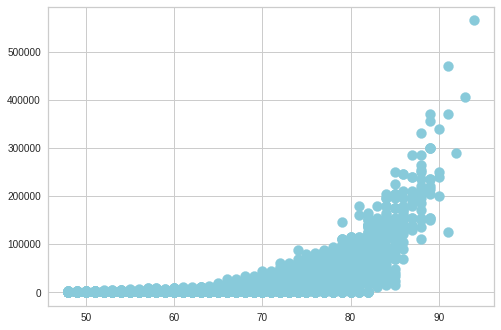

In [109]:
#plt.scatter(df.nationality, df.club, s =100, c = "c", marker = "o", alpha = 1)
plt.scatter(df.overall, df.wage_eur, s =100, c = "c", marker = "o", alpha = 1) #melihat penyebaran data
plt.show()

MENGUBAH VARIABEL YANG SEBELUMNYA BERBENTUK DATA FRAME MENJADI ARRAY 

DATA WAGE DAN OVERALL

In [110]:
clu_array =  np.array(data) #mengubah data frame ke array
print(clu_array)

[[    94 565000]
 [    93 405000]
 [    92 290000]
 ...
 [    48   1000]
 [    48   1000]
 [    48   2000]]


MENSTANDARKAN UKURAN VARIABLE ARRAY AGAR PERSEBARAN DATA LEBIH BAIK

In [111]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
clu_array = scaler.fit_transform(clu_array)
clu_array

array([[1.        , 1.        ],
       [0.97826087, 0.71681416],
       [0.95652174, 0.51327434],
       ...,
       [0.        , 0.00176991],
       [0.        , 0.00176991],
       [0.        , 0.00353982]])

DATA WAGE DAN OVERALL

/usr/local/lib/python3.6/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


KElbowVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7f702dfda7f0>,
                 k=None, metric=None, model=None, timings=True)

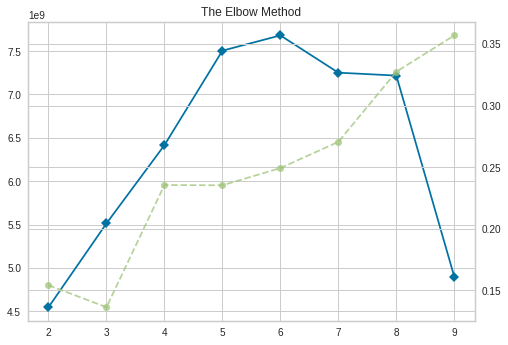

In [112]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,10))
plt.title('The Elbow Method')
visualizer.fit(data)

MENGHITUNG JUMLAH DATA(d) DAN FITUR DATA(f), MENENTUKAN CLUSTERING DATA

DATA WAGE DAN OVERALL

In [113]:
d=data.shape[0] #jumlah data
f=data.shape[1] #jumlah fitur
iter = 10 #iterasi brp kali
Kmeans = 5 #clustering centroids
print(Kmeans)
print(d)
print(f)

5
18278
2


CLUSTERING

In [0]:
Centroids=np.array([]).reshape(n,0)
#assign centroid random
import random
for i in range(Kmeans):
    rand=random.randint(700,m-1)
    Centroids=np.c_[Centroids,clu_array[rand]]
    Output={}

In [0]:
for i in range(iter):
      EuclidianDistance=np.array([]).reshape(m,0)
      #hitung euclidian disatance
      for k in range(Kmeans):
           EucliDist=np.sum((clu_array-Centroids[:,k])**2,axis=1)
           EuclidianDistance=np.c_[EuclidianDistance,EucliDist]
      C=np.argmin(EuclidianDistance,axis=1)+1
      
      #membuat array kosong
      P={}
      for k in range(Kmeans):
          P[k+1]=np.array([]).reshape(2,0)
      #menyimpan data array ke P
      for i in range(d):
          P[C[i]]=np.c_[P[C[i]],clu_array[i]]
      #hitung data mean untuk centroid
      for k in range(Kmeans):
          P[k+1]=np.transpose(P[k+1])
          Centroids[:,k]=np.mean(P[k+1],axis=0)
          
      Output=P

MEMVISUALISASIKAN HASIL CLUSTERING

DATA WAGE DAN OVERALL

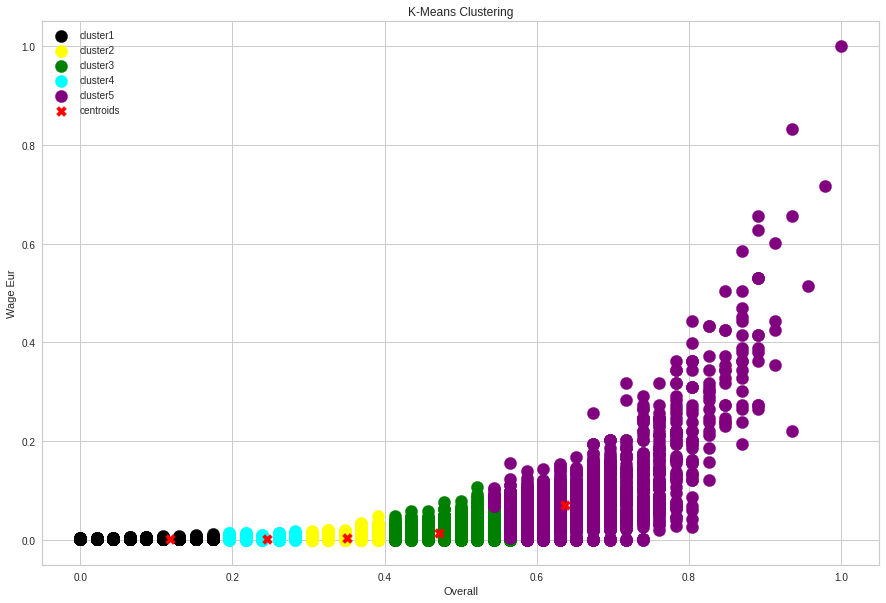

In [116]:
color=['black','yellow','green','cyan','purple','pink'] #warna clustering
labels=['cluster1','cluster2','cluster3','cluster4','cluster5','cluster6'] #label clustering
plt.figure(figsize=(15,10))
for k in range(Kmeans):
    plt.scatter(Output[k+1][:,0],Output[k+1][:,1],s=150,c=color[k],label=labels[k])

plt.scatter(Centroids[0,:],Centroids[1,:],s=100,c='red',marker='X',label='centroids') #centroids

plt.title('K-Means Clustering')
plt.xlabel('Overall')
plt.ylabel('Wage Eur')
plt.legend()

plt.show()

DATA NATIONALITY DAN CLUB

In [118]:
#DATA 2
data['nationality']=df['nationality']
data['club'] = df['club']

data.head()

,nationality,club
0,Argentina,FC Barcelona
1,Portugal,Juventus
2,Brazil,Paris Saint-Germain
3,Slovenia,Atlético Madrid
4,Belgium,Real Madrid


MENGUBAH DATA DARI STRING KE FLOAT JIKA MENGGUNAKAN DATA STRING UNTUK NATIONALITY DAN CLUB

In [119]:
#encode data
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in data.select_dtypes(include=['object','category']).columns:
    data[col] = data[col].astype('category')
    data[col] = data[col].cat.codes
data

,nationality,club
0,5,224
1,121,350
2,18,462
3,133,63
4,12,505
...,...,...
18273,28,79
18274,28,574
18275,28,317
18276,28,573


DATA NATIONALITY DAN CLUB

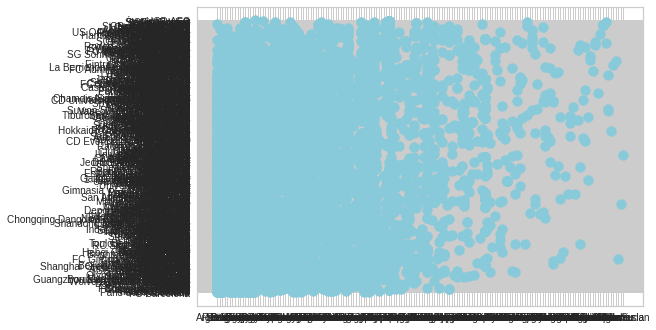

In [120]:
plt.scatter(df.nationality, df.club, s =100, c = "c", marker = "o", alpha = 1)
#plt.scatter(df.overall, df.wage_eur, s =100, c = "c", marker = "o", alpha = 1) #melihat penyebaran data
plt.show()

DATA NATIONALITY DAN CLUB

In [121]:
clu_array =  np.array(data) #mengubah data frame ke array
print(clu_array)

[[  5 224]
 [121 350]
 [ 18 462]
 ...
 [ 28 317]
 [ 28 573]
 [ 28 317]]


MENSTANDARKAN UKURAN VARIABLE ARRAY AGAR PERSEBARAN DATA LEBIH BAIK

In [122]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
clu_array = scaler.fit_transform(clu_array)
clu_array

array([[0.0310559 , 0.32137733],
       [0.7515528 , 0.50215208],
       [0.11180124, 0.66284075],
       ...,
       [0.17391304, 0.45480631],
       [0.17391304, 0.82209469],
       [0.17391304, 0.45480631]])

MENENTUKAN JUMLAH CLUSTER YANG TERBAIK

DATA NATIONALITY DAN CLUB

/usr/local/lib/python3.6/dist-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


KElbowVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7f702d0cd860>,
                 k=None, metric=None, model=None, timings=True)

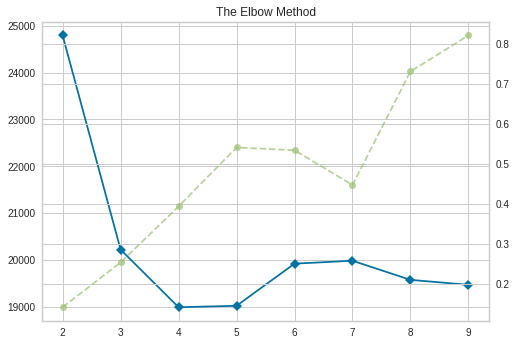

In [123]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,10))
plt.title('The Elbow Method')
visualizer.fit(data)

DATA NATIONALITY DAN CLUB

In [124]:
d=data.shape[0] #jumlah data
f=data.shape[1] #jumlah fitur
iter = 10 #iterasi brp kali
Kmeans = 4 #clustering centroids
print(Kmeans)
print(d)
print(f)

4
18278
2


In [0]:
Centroids=np.array([]).reshape(n,0)
#assign centroid random
import random
for i in range(Kmeans):
    rand=random.randint(700,m-1)
    Centroids=np.c_[Centroids,clu_array[rand]]
    Output={}

In [0]:
for i in range(iter):
      EuclidianDistance=np.array([]).reshape(m,0)
      #hitung euclidian disatance
      for k in range(Kmeans):
           EucliDist=np.sum((clu_array-Centroids[:,k])**2,axis=1)
           EuclidianDistance=np.c_[EuclidianDistance,EucliDist]
      C=np.argmin(EuclidianDistance,axis=1)+1
      
      #membuat array kosong
      P={}
      for k in range(Kmeans):
          P[k+1]=np.array([]).reshape(2,0)
      #menyimpan data array ke P
      for i in range(d):
          P[C[i]]=np.c_[P[C[i]],clu_array[i]]
      #hitung data mean untuk centroid
      for k in range(Kmeans):
          P[k+1]=np.transpose(P[k+1])
          Centroids[:,k]=np.mean(P[k+1],axis=0)
          
      Output=P

DATA NATIONALITY DAN CLUB

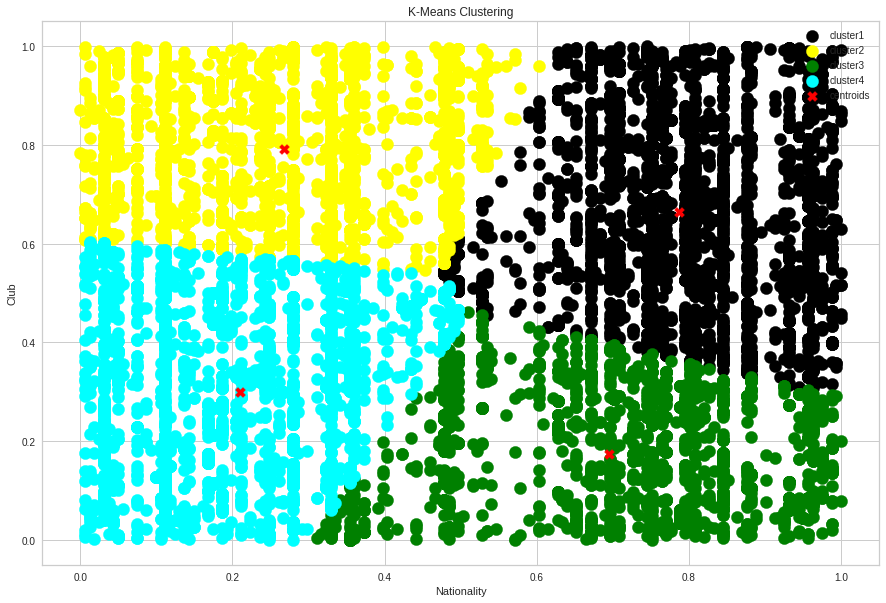

In [127]:
color=['black','yellow','green','cyan','purple','pink'] #warna clustering
labels=['cluster1','cluster2','cluster3','cluster4','cluster5','cluster6'] #label clustering
plt.figure(figsize=(15,10))
for k in range(Kmeans):
    plt.scatter(Output[k+1][:,0],Output[k+1][:,1],s=150,c=color[k],label=labels[k])

plt.scatter(Centroids[0,:],Centroids[1,:],s=100,c='red',marker='X',label='centroids') #centroids

plt.title('K-Means Clustering')
plt.xlabel('Nationality')
plt.ylabel('Club')
plt.legend()

plt.show()